In [22]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [23]:
datagen = ImageDataGenerator()

In [24]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [25]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 1270 images belonging to 5 classes.


In [26]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 362 images belonging to 5 classes.


In [27]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 184 images belonging to 5 classes.


In [28]:


## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
     


In [29]:
## will not train base mode
base_model.trainable = False 

In [30]:
#base_model.summary()

In [31]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [32]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [33]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10


C:\Users\root\anaconda3\envs\DL\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 643s 16s/step - accuracy: 0.7309 - loss: 3.0572 - val_accuracy: 0.8950 - val_loss: 0.3369
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 637s 16s/step - accuracy: 0.9512 - loss: 0.3016 - val_accuracy: 0.9116 - val_loss: 0.5543
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3179s 81s/step - accuracy: 0.9878 - loss: 0.0577 - val_accuracy: 0.8923 - val_loss: 0.6745
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 743s 19s/step - accuracy: 0.9956 - loss: 0.0284 - val_accuracy: 0.9061 - val_loss: 0.7733
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 693s 17s/step - accuracy: 0.9955 - loss: 0.0101 - val_accuracy: 0.9033 - val_loss: 0.7759
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 692s 17s/step - accuracy: 0.9998 - loss: 0.0017 - val_accuracy: 0.8895 - val_loss: 0.9964
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 710s 18s/step - accuracy: 0.9983 - loss: 0.0037 - val_accuracy: 0.9061 - val_loss: 0.7401
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 729s 18s/step - accuracy: 1.0000 - loss: 1.7285e-04 - val_accuracy: 0.9033 -

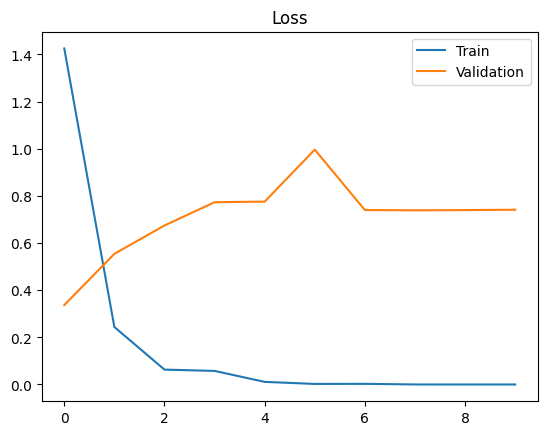

In [34]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

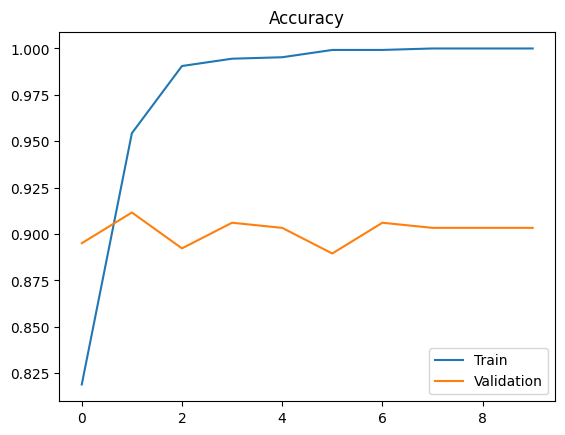

In [35]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 80s 13s/step - accuracy: 0.9312 - loss: 0.7592
The test loss is:  0.7374932765960693
The best accuracy is:  91.847825050354


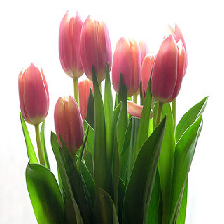

In [37]:
img = tf.keras.preprocessing.image.load_img('C:/Users/root/flower_data/data-split/test/tulip/112428665_d8f3632f36_n.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [38]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.98520386 0.01479608 0.         0.         0.        ]]


In [39]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[0]


In [40]:
# transform classes number into classes name
class_names[class_id.item()]

'daisy'